# Apartment Price in Victoria

The Dataset provides living area and conservation status.

There are 218 observations and 16 variables.

**Problem**:
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

## Import Libraries

In [208]:
import pandas as pd
import numpy as np

#Plot
import seaborn as sns
import matplotlib.pyplot as plt

#Regression Analysis
from sklearn import linear_model
import statsmodels.api as sm

### 1. Import Dataset

In [209]:
# Import Dataset 'victoria.csv'
data=pd.read_csv('victoria.csv')

# Set index 'row.labels'
data=data.set_index('row.labels')

In [210]:
# Get 5 first rows of data
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [211]:
# Get 5 last rows of data
data.tail()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
214,215000,7290000153,Z45,3B,18,3,4,E100,2A,1,0,0,S3,3A,1
215,340000,9561000061,Z56,2B,8,6,5,E50,1A,2,1,1,S3,3A,1
216,280000,8322000122,Z34,3B,29,7,5,E50,2B,1,1,1,S3,4A,1
217,224000,7920999908,Z38,4A,6,3,4,E100,1A,1,0,1,S3,3A,1
218,237000,8138999939,Z61,4B,20,2,4,E100,2B,1,0,1,S4,4A,1


In [212]:
# Get dimension of data
data.shape

(218, 15)

From the dataframe above it can be seen that there are 218 apartments with 15 variables that describe each apartment. Among them are:
- totalprice : price of apartment
- area : spacious of apartment
- zone : location/zone of apartment
- category : grade of apartment
- age : Age of apartment building since it was founded
- floor : number of floor in apartment
- rooms : number of rooms in apartment
- out : acsess out of apartment
- conservation : conservation of apartment
- toilets : number of toilets in apartment
- garage : presence / absence of garage in the apartment (0: none, 1: yes)
- elevator : presence / absence of garage in the apartment (0: none, 1: yes)
- streetcategory : category of street to the apartment
- heating : type of heater in the apartment
- tras : availability of rubbish bins / garbage transport services (0: none, 1:yes)

### 2. Get Summary of Dataset

In [213]:
#Get information type data each variables in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 218
Data columns (total 15 columns):
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(9), object(6)
memory usage: 27.2+ KB


From the above output it appears that there are features that are supposed to be numeric but the data type is still object / string (categorical). So it needs to be converted into numeric types.

In [214]:
# Redifined Conservastion
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
data['conservation'] = data['conservation'].replace(dicti)

In [215]:
# Convert data type 
data['conservation'] = data['conservation'].astype(str)
data['garage'] = data['garage'].astype(str)
data['elevator'] = data['elevator'].astype(str)
data['tras'] = data['tras'].astype(str)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
1,228000,7530999756,Z45,4B,33,3,5,E100,3,1,0,1,S3,3A,0
2,409000,1006500015,Z31,3B,5,7,5,E50,1,2,1,1,S5,4A,1
3,200000,8887000275,Z52,3A,14,8,5,E50,1,2,0,1,S2,3A,0
4,180000,6261000061,Z62,4A,41,3,4,E50,2,1,0,0,S3,1A,0
5,443600,1461499939,Z31,3A,22,6,7,E100,1,2,0,1,S4,4A,1


In [216]:
# Checking type data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 218
Data columns (total 15 columns):
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null object
elevator          218 non-null object
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null object
dtypes: int64(6), object(9)
memory usage: 27.2+ KB


From information about type data above is 9 features are categorical (zone, category, out, conservation, garage, elevator, streetcategory, heating) and 6  features numerical (totalprice, area, age, floor, rooms, toilets).

**Get Summary of Data**

In [217]:
data.describe()

,totalprice,area,age,floor,rooms,toilets
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000
mean,280741.522936,5.718657e+09,19.899083,4.440367,4.853211,1.467890
std,69298.460578,3.455007e+09,14.595590,2.126988,0.634285,0.500116
min,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000
25%,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000
50%,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000
75%,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000
max,560000.000000,9.992000e+09,118.000000,12.000000,7.000000,2.000000


Using this function, only numerical features that have summary statistics.

The conclusions we get from the summary statistics above are:
- The price range of apartments in Victoria is 280741.522 where the most expensive apartment prices are 560000 and the cheapest is 155000. Variations in prices of these apartments are likely to be adjusted to the facilities and the area of the apartment.
- The average age of apartments is 19 years. Where there is a newly built apartment also a new one year old. And the other apartment is 118 years old.
- Mean number of rooms and floors is 4, and toilets is 1.

### 3. Visualization 

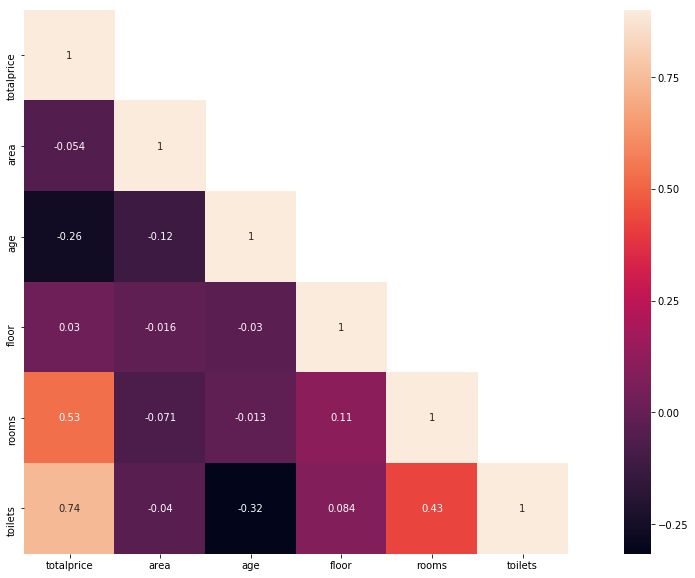

In [218]:
#create correlation with hitmap before convert label each variable to string

#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Correlation**
- Correlation of totalprice and toilets is 0.74
- Correlation of totalprice and rooms is 0.53
- Correlation of toiltes and rooms is 0.43

Thus, the price of the apartment correlates with the number of toilets and the number of rooms in the apartment.

Text(0.5,0,'Type of Zone')

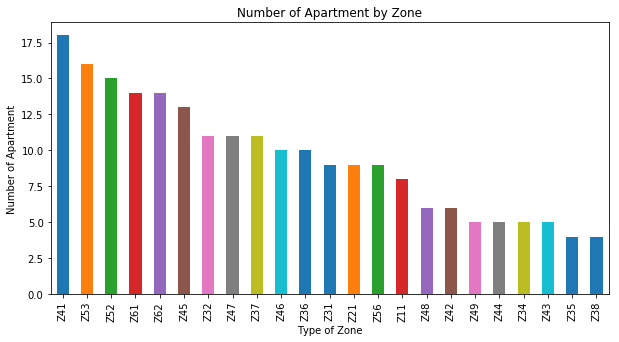

In [219]:
#Distribution of Apartment by Zone

data['zone'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by Zone")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of Zone')

Text(0.5,0,'Type of Category')

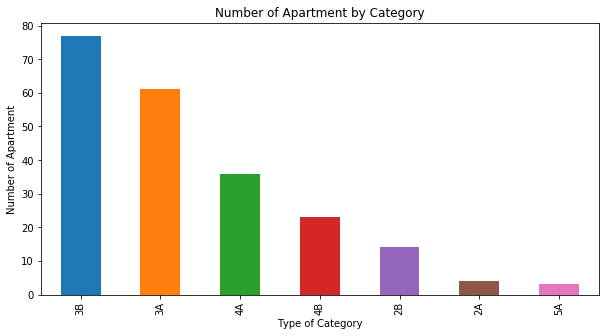

In [220]:
#Distribution of Apartment by category

data['category'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by Category")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of Category')

Text(0.5,0,'Type of out')

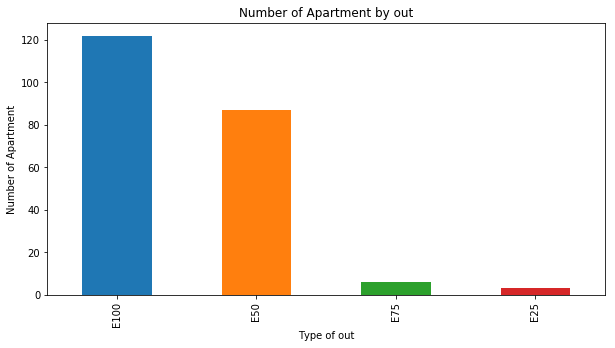

In [221]:
#Distribution of Apartment by out

data['out'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by out")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of out')

Text(0.5,0,'Type of conservation')

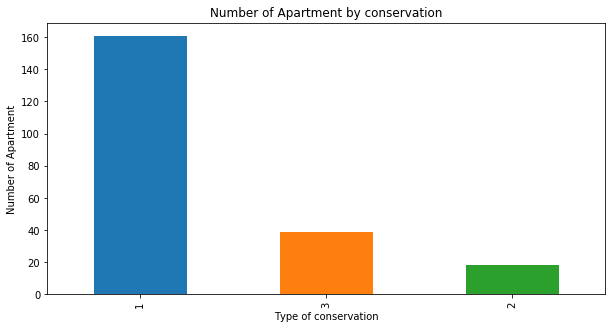

In [222]:
#Distribution of Apartment by out

data['conservation'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by conservation")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of conservation')

Text(0.5,0,'Type of streetcategory')

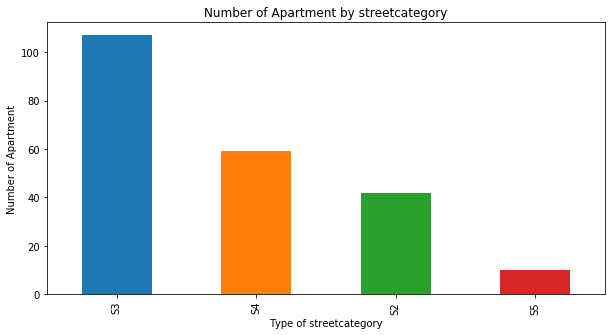

In [223]:
#Distribution of Apartment by streetcategory

data['streetcategory'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by streetcategory")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of streetcategory')

Text(0.5,0,'Type of heating')

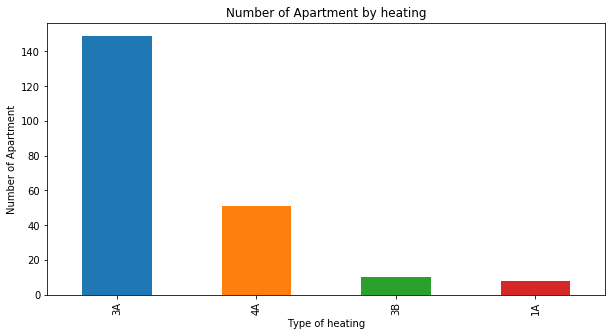

In [224]:
#Distribution of Apartment by heating

data['heating'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Apartment by heating")
plt.ylabel('Number of Apartment')
plt.xlabel('Type of heating')

### 4. Variable Selection

Choosing variables for regression model by forming a regression model using all variables. Then, checking whether variable is significant to the model by looking at the p-value. The significance model is a variables that has a p-value of less than 0.05, so the smaller p-value of variables has more influence on the total price.

**Model 1**

In [225]:
Y = data['totalprice']
X = data.drop('totalprice', 1)
X = pd.get_dummies(X)

In [226]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     24.83
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.71e-55
Time:                        22:30:39   Log-Likelihood:                -2508.8
No. Observations:                 218   AIC:                             5118.
Df Residuals:                     168   BIC:                             5287.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
area              -1.515e-06   6.84e-07     -2.214      0.028   -2.87e-06   -1.64e-07
age                  84.1540    228.164      0.369      0.713    -366.283     534.591
floor              -134.7802   1047.664     -0.129      0.898   -2203.062    1933.502
rooms              1.883e+04   3901.232      4.827      0.000    1.11e+04    2.65e+04
toilets            3.596e+04   6489.175      5.541      0.000    2.31e+04    4.88e+04
zone_Z11          -2.203e+04   1.47e+04     -1.503      0.135    -5.1e+04    6899.470
zone_Z21           7.125e+04   9445.924      7.543      0.000    5.26e+04    8.99e+04
zone_Z31           6.385e+04   1.17e+04      5.458      0.000    4.08e+04    8.69e+04
zone_Z32           7293.9731   8980.493      0.812      0.418   -1.04e+04     2.5e+04
zone_Z34          -1.653e+04   1.32e+04     -1.248      0.214   -4.27e+04    9622.145
zone_Z35           2.931e+04   1.52e+04      1.932      0.055    -641.164    5.93e+04
zone_Z36            695.7380   9551.475      0.073      0.942   -1.82e+04    1.96e+04
zone_Z37           5.227e+04   1.02e+04      5.139      0.000    3.22e+04    7.23e+04
zone_Z38          -1120.4370   1.41e+04     -0.079      0.937    -2.9e+04    2.68e+04
zone_Z41           1.223e+04   7896.143      1.548      0.123   -3362.809    2.78e+04
zone_Z42           7.415e+04    1.4e+04      5.284      0.000    4.65e+04    1.02e+05
zone_Z43           4073.5841   1.34e+04      0.304      0.761   -2.24e+04    3.05e+04
zone_Z44          -3753.5729   1.39e+04     -0.270      0.787   -3.12e+04    2.37e+04
zone_Z45          -2.107e+04   8909.512     -2.365      0.019   -3.87e+04   -3483.574
zone_Z46          -2.609e+04   1.01e+04     -2.571      0.011   -4.61e+04   -6055.861
zone_Z47          -4.908e+04   9825.004     -4.995      0.000   -6.85e+04   -2.97e+04
zone_Z48           1661.3375   1.19e+04      0.139      0.890   -2.19e+04    2.52e+04
zone_Z49          -4626.2487   1.26e+04     -0.367      0.714   -2.95e+04    2.03e+04
zone_Z52          -3.343e+04   8786.173     -3.805      0.000   -5.08e+04   -1.61e+04
zone_Z53          -1.927e+04   8498.661     -2.267      0.025    -3.6e+04   -2490.446
zone_Z56          -5196.1668   1.15e+04     -0.452      0.652   -2.79e+04    1.75e+04
zone_Z61          -1.495e+04   7724.490     -1.936      0.055   -3.02e+04     298.406
zone_Z62          -2.513e+04   8840.361     -2.843      0.005   -4.26e+04   -7679.992
category_2A        3.659e+04   1.59e+04      2.297      0.023    5136.552     6.8e+04
category_2B        4.327e+04   8903.590      4.860      0.000    2.57e+04    6.08e+04
category_3A        1.304e+04   6761.501      1.929      0.055    -306.367    2.64e+04
category_3B        8931.3112   5900.133      1.514      0.132   -2716.644    2.06e+04
category_4A        1.099e+04   6815.279      1.612      0.109   -2467.607

**Model 2**

In [227]:
Y = data['totalprice']
X1 = data.drop(['totalprice', 'area'],1)
X1 = pd.get_dummies(X1)

In [228]:
model=sm.OLS(Y,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     24.68
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.49e-55
Time:                        22:30:39   Log-Likelihood:                -2511.9
No. Observations:                 218   AIC:                             5122.
Df Residuals:                     169   BIC:                             5288.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                 157.2975    228.350      0.689      0.492    -293.488     608.083
floor               -19.8186   1058.385     -0.019      0.985   -2109.177    2069.540
rooms              2.011e+04   3902.282      5.154      0.000    1.24e+04    2.78e+04
toilets            3.757e+04   6522.302      5.760      0.000    2.47e+04    5.04e+04
zone_Z11          -2.084e+04   1.48e+04     -1.407      0.161   -5.01e+04    8405.782
zone_Z21           7.044e+04   9547.080      7.378      0.000    5.16e+04    8.93e+04
zone_Z31           6.826e+04   1.17e+04      5.855      0.000    4.52e+04    9.13e+04
zone_Z32           6809.0335   9080.859      0.750      0.454   -1.11e+04    2.47e+04
zone_Z34          -1.963e+04   1.33e+04     -1.473      0.143   -4.59e+04    6671.338
zone_Z35           3.297e+04   1.53e+04      2.161      0.032    2855.869    6.31e+04
zone_Z36           4304.4012   9519.380      0.452      0.652   -1.45e+04    2.31e+04
zone_Z37           5.363e+04   1.03e+04      5.223      0.000    3.34e+04    7.39e+04
zone_Z38          -3780.5482   1.42e+04     -0.265      0.791   -3.19e+04    2.43e+04
zone_Z41           1.104e+04   7968.236      1.385      0.168   -4694.588    2.68e+04
zone_Z42           7.786e+04   1.41e+04      5.525      0.000       5e+04    1.06e+05
zone_Z43           1193.6058   1.35e+04      0.089      0.930   -2.54e+04    2.78e+04
zone_Z44            441.5330   1.39e+04      0.032      0.975    -2.7e+04    2.79e+04
zone_Z45          -2.412e+04   8903.840     -2.709      0.007   -4.17e+04   -6539.113
zone_Z46          -2.778e+04   1.02e+04     -2.714      0.007    -4.8e+04   -7569.672
zone_Z47          -5.249e+04   9814.349     -5.349      0.000   -7.19e+04   -3.31e+04
zone_Z48           -567.8341    1.2e+04     -0.047      0.962   -2.43e+04    2.32e+04
zone_Z49          -7515.7014   1.27e+04     -0.592      0.554   -3.26e+04    1.75e+04
zone_Z52          -3.391e+04   8884.390     -3.817      0.000   -5.14e+04   -1.64e+04
zone_Z53          -2.143e+04   8539.406     -2.509      0.013   -3.83e+04   -4570.008
zone_Z56          -7189.0464   1.16e+04     -0.620      0.536   -3.01e+04    1.57e+04
zone_Z61          -1.687e+04   7764.023     -2.172      0.031   -3.22e+04   -1538.818
zone_Z62          -2.558e+04   8939.507     -2.861      0.005   -4.32e+04   -7930.210
category_2A        3.673e+04   1.61e+04      2.279      0.024    4914.415    6.85e+04
category_2B        4.197e+04   8986.223      4.670      0.000    2.42e+04    5.97e+04
category_3A        1.347e+04   6836.284      1.971      0.050     -23.624     2.7e+04
category_3B        8467.7862   5964.090      1.420      0.158   -3305.926    2.02e+04
category_4A        8887.0079   6826.405      1.302      0.195   -4589.001    2.24e+04
category_4B       -8983.5595   7316.468     -1.228      0.221   -2.34e+04

**Model 3**

In [229]:
Y = data['totalprice']
X2 = data.drop(['totalprice', 'area', 'zone'],1)
X2 = pd.get_dummies(X2)

In [230]:
model=sm.OLS(Y,X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     18.19
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           9.95e-39
Time:                        22:30:40   Log-Likelihood:                -2602.9
No. Observations:                 218   AIC:                             5260.
Df Residuals:                     191   BIC:                             5351.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                 319.3697    264.319      1.208      0.228    -201.990     840.729
floor             -3068.2264   1361.976     -2.253      0.025   -5754.672    -381.781
rooms              2.517e+04   5094.224      4.940      0.000    1.51e+04    3.52e+04
toilets            3.856e+04   8370.473      4.607      0.000    2.21e+04    5.51e+04
category_2A        5.704e+04   2.14e+04      2.667      0.008    1.48e+04    9.92e+04
category_2B        4.236e+04   1.22e+04      3.464      0.001    1.82e+04    6.65e+04
category_3A        1.361e+04   9102.855      1.495      0.136   -4343.872    3.16e+04
category_3B        3616.8428   7882.179      0.459      0.647   -1.19e+04    1.92e+04
category_4A       -1505.1261   9112.673     -0.165      0.869   -1.95e+04    1.65e+04
category_4B       -1.316e+04   9970.831     -1.320      0.189   -3.28e+04    6508.166
category_5A       -4.379e+04   2.96e+04     -1.479      0.141   -1.02e+05    1.46e+04
out_E100           4841.1362   8226.378      0.588      0.557   -1.14e+04    2.11e+04
out_E25            2.761e+04   2.01e+04      1.375      0.171    -1.2e+04    6.72e+04
out_E50            7682.8642   8690.407      0.884      0.378   -9458.634    2.48e+04
out_E75            1.804e+04   1.45e+04      1.247      0.214   -1.05e+04    4.66e+04
conservation_1     2.281e+04   6241.790      3.654      0.000    1.05e+04    3.51e+04
conservation_2     2.286e+04   8873.774      2.576      0.011    5359.244    4.04e+04
conservation_3     1.251e+04   8064.882      1.551      0.123   -3401.283    2.84e+04
garage_0          -7825.0000   9866.238     -0.793      0.429   -2.73e+04    1.16e+04
garage_1           1.999e+04   1.03e+04      1.947      0.053    -258.935    4.02e+04
garage_2           4.601e+04   2.13e+04      2.165      0.032    4092.100    8.79e+04
elevator_0          1.48e+04   7973.339      1.856      0.065    -931.677    3.05e+04
elevator_1         4.338e+04   8437.190      5.142      0.000    2.67e+04       6e+04
streetcategory_S2   -14.5161   7245.061     -0.002      0.998   -1.43e+04    1.43e+04
streetcategory_S3 -8091.6576   5166.448     -1.566      0.119   -1.83e+04    2098.964
streetcategory_S4  1.501e+04   6325.827      2.373      0.019    2531.132    2.75e+04
streetcategory_S5  5.128e+04    1.1e+04      4.678      0.000    2.97e+04    7.29e+04
heating_1A         9785.7987   1.65e+04      0.592      0.555   -2.28e+04    4.24e+04
heating_3A         1.165e+04   7296.182      1.597      0.112   -2740.930     2.6e+04
heating_3B         1.463e+04   1.33e+04      1.098      0.273   -1.16e+04    4.09e+04
heating_4A         2.211e+04   8859.528      2.495      0.013    4632.004    3.96e+04
tras_0             9122.3792   1.35e+04      0.676      0.500   -1.75e+04    3.58e+04
tras_1             2.503e+04   1.25e+04      1.997      0.047     306.712

**Model 4**

In [231]:
Y = data['totalprice']
X3 = data.drop(['totalprice', 'area', 'zone', 'streetcategory'],1)
X3 = pd.get_dummies(X3)

In [232]:
model=sm.OLS(Y,X3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     17.40
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.28e-35
Time:                        22:30:40   Log-Likelihood:                -2616.7
No. Observations:                 218   AIC:                             5281.
Df Residuals:                     194   BIC:                             5363.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age              357.2192    276.246      1.293      0.198    -187.613     902.051
floor          -2744.3652   1433.287     -1.915      0.057   -5571.190      82.460
rooms           2.855e+04   5279.373      5.409      0.000    1.81e+04     3.9e+04
toilets         4.072e+04   8819.815      4.617      0.000    2.33e+04    5.81e+04
category_2A     4.872e+04   2.25e+04      2.169      0.031    4413.654     9.3e+04
category_2B     3.902e+04   1.29e+04      3.022      0.003    1.35e+04    6.45e+04
category_3A     1.038e+04   9538.779      1.088      0.278   -8434.086    2.92e+04
category_3B     3023.0855   8353.280      0.362      0.718   -1.35e+04    1.95e+04
category_4A    -5541.8403   9474.980     -0.585      0.559   -2.42e+04    1.31e+04
category_4B    -1.604e+04   1.05e+04     -1.526      0.129   -3.68e+04    4695.057
category_5A    -3.123e+04    3.1e+04     -1.006      0.316   -9.24e+04       3e+04
out_E100         668.7425   8675.445      0.077      0.939   -1.64e+04    1.78e+04
out_E25         2.933e+04   2.12e+04      1.382      0.169   -1.25e+04    7.12e+04
out_E50         6600.6958   9181.651      0.719      0.473   -1.15e+04    2.47e+04
out_E75         1.173e+04   1.53e+04      0.766      0.444   -1.85e+04    4.19e+04
conservation_1  2.031e+04   6797.829      2.987      0.003    6898.414    3.37e+04
conservation_2  1.752e+04   9508.234      1.843      0.067   -1230.794    3.63e+04
conservation_3   1.05e+04   8651.484      1.214      0.226   -6563.393    2.76e+04
garage_0       -1.378e+04   1.04e+04     -1.331      0.185   -3.42e+04    6640.919
garage_1        1.888e+04   1.09e+04      1.727      0.086   -2677.644    4.04e+04
garage_2        4.323e+04   2.25e+04      1.920      0.056   -1167.874    8.76e+04
elevator_0      1.113e+04   8715.682      1.277      0.203   -6055.715    2.83e+04
elevator_1      3.719e+04   9294.414      4.002      0.000    1.89e+04    5.55e+04
heating_1A      1897.5501   1.74e+04      0.109      0.913   -3.23e+04    3.61e+04
heating_3A      1.014e+04   7808.923      1.299      0.196   -5261.182    2.55e+04
heating_3B      1.533e+04   1.41e+04      1.084      0.280   -1.26e+04    4.32e+04
heating_4A      2.096e+04   9430.309      2.223      0.027    2362.243    3.96e+04
tras_0          1.038e+04   1.42e+04      0.730      0.467   -1.77e+04    3.85e+04
tras_1          2.549e+04   1.32e+04      1.936      0.054    -476.440    5.15e+04
tras_2          1.245e+04    3.1e+04      0.401      0.689   -4.87e+04    7.36e+04
==============================================================================
Omnibus:                       30.893   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.005
Skew:                           0.771   Prob(JB):                     5.10e-12
Kurtosis:                   

**Model 5**

In [233]:
Y = data['totalprice']
X4 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating'],1)
X4 = pd.get_dummies(X4)

In [234]:
model=sm.OLS(Y,X4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     19.99
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           4.17e-37
Time:                        22:30:40   Log-Likelihood:                -2617.9
No. Observations:                 218   AIC:                             5278.
Df Residuals:                     197   BIC:                             5349.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age              408.9595    272.092      1.503      0.134    -127.628     945.547
floor          -2596.1572   1422.554     -1.825      0.070   -5401.547     209.232
rooms           2.953e+04   5199.417      5.680      0.000    1.93e+04    3.98e+04
toilets         4.143e+04   8743.352      4.738      0.000    2.42e+04    5.87e+04
category_2A      5.35e+04   2.03e+04      2.639      0.009    1.35e+04    9.35e+04
category_2B     4.044e+04   1.25e+04      3.243      0.001    1.58e+04     6.5e+04
category_3A     1.184e+04   8750.229      1.353      0.178   -5420.018    2.91e+04
category_3B     5379.8834   7340.693      0.733      0.464   -9096.543    1.99e+04
category_4A    -4718.2391   8542.698     -0.552      0.581   -2.16e+04    1.21e+04
category_4B     -1.68e+04   1.02e+04     -1.642      0.102    -3.7e+04    3382.575
category_5A    -4.045e+04   2.56e+04     -1.581      0.116   -9.09e+04       1e+04
out_E100         -87.2738   8640.979     -0.010      0.992   -1.71e+04     1.7e+04
out_E25         2.889e+04   2.12e+04      1.360      0.175    -1.3e+04    7.08e+04
out_E50         5677.9760   9120.413      0.623      0.534   -1.23e+04    2.37e+04
out_E75          1.47e+04   1.54e+04      0.957      0.340   -1.56e+04     4.5e+04
conservation_1  2.119e+04   7034.005      3.012      0.003    7316.860    3.51e+04
conservation_2  1.593e+04   9502.396      1.677      0.095   -2807.063    3.47e+04
conservation_3  1.207e+04   9036.476      1.335      0.183   -5753.650    2.99e+04
garage_0       -1.241e+04   1.04e+04     -1.190      0.235    -3.3e+04    8150.361
garage_1        1.946e+04    1.1e+04      1.765      0.079   -2278.565    4.12e+04
garage_2        4.214e+04   2.26e+04      1.862      0.064   -2486.927    8.68e+04
elevator_0      1.048e+04   9059.618      1.156      0.249   -7390.863    2.83e+04
elevator_1      3.871e+04      1e+04      3.870      0.000     1.9e+04    5.84e+04
tras_0          9828.7626    1.4e+04      0.700      0.485   -1.79e+04    3.75e+04
tras_1          2.746e+04   1.31e+04      2.100      0.037    1668.551    5.33e+04
tras_2           1.19e+04   3.12e+04      0.381      0.704   -4.97e+04    7.35e+04
==============================================================================
Omnibus:                       29.259   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.416
Skew:                           0.751   Prob(JB):                     5.06e-11
Kurtosis:                       4.722   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearit

**Model 6**

In [235]:
Y = data['totalprice']
X5 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out'],1)
X5 = pd.get_dummies(X5)

In [236]:
model=sm.OLS(Y,X5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     23.46
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.14e-38
Time:                        22:30:40   Log-Likelihood:                -2619.2
No. Observations:                 218   AIC:                             5274.
Df Residuals:                     200   BIC:                             5335.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age              398.8026    266.346      1.497      0.136    -126.404     924.009
floor          -2621.3326   1418.656     -1.848      0.066   -5418.774     176.109
rooms           3.038e+04   5155.786      5.891      0.000    2.02e+04    4.05e+04
toilets          3.97e+04   8609.412      4.611      0.000    2.27e+04    5.67e+04
category_2A     5.383e+04   1.99e+04      2.703      0.007    1.46e+04    9.31e+04
category_2B     3.861e+04   1.22e+04      3.152      0.002    1.45e+04    6.28e+04
category_3A     9572.4833   8456.697      1.132      0.259   -7103.245    2.62e+04
category_3B     3865.8262   7002.712      0.552      0.582   -9942.795    1.77e+04
category_4A    -5117.5940   8452.387     -0.605      0.546   -2.18e+04    1.15e+04
category_4B    -1.739e+04   1.02e+04     -1.709      0.089   -3.75e+04    2679.265
category_5A    -3.295e+04    2.4e+04     -1.374      0.171   -8.02e+04    1.43e+04
conservation_1  2.203e+04   7444.612      2.959      0.003    7349.298    3.67e+04
conservation_2   1.65e+04   9929.650      1.662      0.098   -3078.970    3.61e+04
conservation_3  1.188e+04   9391.029      1.265      0.207   -6636.511    3.04e+04
garage_0       -1.132e+04   1.05e+04     -1.074      0.284   -3.21e+04    9460.495
garage_1        2.025e+04   1.12e+04      1.810      0.072   -1810.139    4.23e+04
garage_2        4.148e+04   2.29e+04      1.808      0.072   -3756.766    8.67e+04
elevator_0      1.132e+04   9938.728      1.139      0.256   -8282.446    3.09e+04
elevator_1       3.91e+04   1.09e+04      3.593      0.000    1.76e+04    6.06e+04
tras_0          1.047e+04    1.4e+04      0.750      0.454    -1.7e+04     3.8e+04
tras_1          2.851e+04    1.3e+04      2.194      0.029    2885.392    5.41e+04
tras_2          1.144e+04   3.16e+04      0.362      0.718   -5.08e+04    7.37e+04
==============================================================================
Omnibus:                       29.939   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.454
Skew:                           0.786   Prob(JB):                     8.18e-11
Kurtosis:                       4.625   Cond. No.                     4.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model 7**

In [237]:
Y = data['totalprice']
X6 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation'],1)
X6 = pd.get_dummies(X6)

In [238]:
model=sm.OLS(Y,X6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     26.61
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           7.49e-40
Time:                        22:30:40   Log-Likelihood:                -2619.8
No. Observations:                 218   AIC:                             5272.
Df Residuals:                     202   BIC:                             5326.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age           280.3487    239.754      1.169      0.244    -192.393     753.090
floor       -2577.2308   1415.064     -1.821      0.070   -5367.423     212.961
rooms        2.992e+04   5110.083      5.855      0.000    1.98e+04       4e+04
toilets      4.046e+04   8476.486      4.773      0.000    2.37e+04    5.72e+04
category_2A  5.779e+04      2e+04      2.895      0.004    1.84e+04    9.72e+04
category_2B  4.295e+04   1.22e+04      3.535      0.001     1.9e+04    6.69e+04
category_3A  1.399e+04   8305.770      1.684      0.094   -2386.608    3.04e+04
category_3B  6952.7648   7059.163      0.985      0.326   -6966.333    2.09e+04
category_4A -3545.1435   8531.644     -0.416      0.678   -2.04e+04    1.33e+04
category_4B -1.673e+04   1.02e+04     -1.642      0.102   -3.68e+04    3361.793
category_5A  -3.36e+04   2.39e+04     -1.405      0.162   -8.08e+04    1.36e+04
garage_0    -5470.2616   1.09e+04     -0.501      0.617    -2.7e+04    1.61e+04
garage_1     2.642e+04   1.16e+04      2.273      0.024    3499.009    4.94e+04
garage_2     4.686e+04   2.38e+04      1.972      0.050       1.697    9.37e+04
elevator_0   2.089e+04   1.17e+04      1.783      0.076   -2207.545     4.4e+04
elevator_1   4.692e+04   1.29e+04      3.627      0.000    2.14e+04    7.24e+04
tras_0        1.68e+04   1.39e+04      1.208      0.229   -1.06e+04    4.42e+04
tras_1       3.434e+04    1.3e+04      2.643      0.009    8717.561       6e+04
tras_2       1.667e+04   3.24e+04      0.514      0.608   -4.73e+04    8.06e+04
==============================================================================
Omnibus:                       30.917   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.324
Skew:                           0.806   Prob(JB):                     3.21e-11
Kurtosis:                       4.650   Cond. No.                     3.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model 8**

In [239]:
Y = data['totalprice']
X7 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation', 'category'],1)
X7 = pd.get_dummies(X7)

In [240]:
model=sm.OLS(Y,X7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     40.26
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           6.15e-41
Time:                        22:30:40   Log-Likelihood:                -2628.8
No. Observations:                 218   AIC:                             5278.
Df Residuals:                     208   BIC:                             5311.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -12.6225    225.510     -0.056      0.955    -457.200     431.955
floor      -2068.1904   1425.860     -1.450      0.148   -4879.180     742.800
rooms       2.844e+04   5211.107      5.458      0.000    1.82e+04    3.87e+04
toilets     5.224e+04   7468.996      6.994      0.000    3.75e+04     6.7e+04
garage_0   -1.077e+04   1.11e+04     -0.967      0.335   -3.27e+04    1.12e+04
garage_1    2.658e+04   1.22e+04      2.185      0.030    2600.161    5.06e+04
garage_2    5.364e+04   2.47e+04      2.170      0.031    4918.739    1.02e+05
elevator_0  1.952e+04   1.29e+04      1.515      0.131   -5889.109    4.49e+04
elevator_1  4.993e+04   1.43e+04      3.502      0.001    2.18e+04     7.8e+04
tras_0      1.991e+04   1.43e+04      1.393      0.165   -8275.503    4.81e+04
tras_1      3.691e+04   1.31e+04      2.807      0.005     1.1e+04    6.28e+04
tras_2      1.264e+04   3.37e+04      0.374      0.708   -5.39e+04    7.92e+04
==============================================================================
Omnibus:                       37.206   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.877
Skew:                           0.898   Prob(JB):                     8.17e-15
Kurtosis:                       4.979   Cond. No.                     3.64e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model 9**

In [241]:
Y = data['totalprice']
X8 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation', 'category', 'age'],1)
X8 = pd.get_dummies(X8)

In [242]:
model=sm.OLS(Y,X8).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     45.50
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           8.81e-42
Time:                        22:30:41   Log-Likelihood:                -2628.8
No. Observations:                 218   AIC:                             5276.
Df Residuals:                     209   BIC:                             5306.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor      -2064.8456   1421.206     -1.453      0.148   -4866.582     736.890
rooms       2.841e+04   5171.772      5.494      0.000    1.82e+04    3.86e+04
toilets     5.228e+04   7422.315      7.043      0.000    3.76e+04    6.69e+04
garage_0   -1.086e+04    1.1e+04     -0.990      0.323   -3.25e+04    1.08e+04
garage_1     2.65e+04   1.21e+04      2.197      0.029    2720.560    5.03e+04
garage_2    5.367e+04   2.46e+04      2.177      0.031    5071.248    1.02e+05
elevator_0  1.937e+04   1.26e+04      1.539      0.125   -5435.535    4.42e+04
elevator_1  4.993e+04   1.42e+04      3.511      0.001    2.19e+04     7.8e+04
tras_0      1.978e+04   1.41e+04      1.405      0.162   -7980.485    4.75e+04
tras_1      3.686e+04   1.31e+04      2.816      0.005    1.11e+04    6.27e+04
tras_2      1.267e+04   3.37e+04      0.376      0.707   -5.37e+04     7.9e+04
==============================================================================
Omnibus:                       37.068   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.588
Skew:                           0.896   Prob(JB):                     9.44e-15
Kurtosis:                       4.975   Cond. No.                     1.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model 10**

In [243]:
Y = data['totalprice']
X9 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation', 'category', 'age', 'tras'],1)
X9 = pd.get_dummies(X9)

In [244]:
model=sm.OLS(Y,X9).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     58.88
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.92e-42
Time:                        22:30:41   Log-Likelihood:                -2631.5
No. Observations:                 218   AIC:                             5277.
Df Residuals:                     211   BIC:                             5301.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor      -2478.6311   1411.765     -1.756      0.081   -5261.602     304.340
rooms       2.741e+04   5189.869      5.282      0.000    1.72e+04    3.76e+04
toilets     5.434e+04   7411.208      7.332      0.000    3.97e+04     6.9e+04
garage_0    4682.8437   1.14e+04      0.411      0.681   -1.78e+04    2.71e+04
garage_1    4.282e+04    1.3e+04      3.284      0.001    1.71e+04    6.85e+04
garage_2    6.271e+04   2.64e+04      2.373      0.019    1.06e+04    1.15e+05
elevator_0  3.826e+04   1.55e+04      2.464      0.015    7653.649    6.89e+04
elevator_1  7.195e+04   1.74e+04      4.138      0.000    3.77e+04    1.06e+05
==============================================================================
Omnibus:                       36.131   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.949
Skew:                           0.854   Prob(JB):                     4.78e-15
Kurtosis:                       5.084   Cond. No.                     1.24e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model 11**

In [245]:
Y = data['totalprice']
X10 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation', 'category', 'age', 'tras', 'garage'],1)
X10 = pd.get_dummies(X10)

In [246]:
model=sm.OLS(Y,X10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.01
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.19e-39
Time:                        22:30:41   Log-Likelihood:                -2643.7
No. Observations:                 218   AIC:                             5297.
Df Residuals:                     213   BIC:                             5314.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor      -3243.0782   1477.338     -2.195      0.029   -6155.153    -331.004
rooms        2.77e+04   5461.925      5.071      0.000    1.69e+04    3.85e+04
toilets     6.821e+04   7238.174      9.424      0.000    5.39e+04    8.25e+04
elevator_0  3.026e+04   2.41e+04      1.254      0.211   -1.73e+04    7.78e+04
elevator_1  6.827e+04   2.66e+04      2.565      0.011    1.58e+04    1.21e+05
==============================================================================
Omnibus:                       28.037   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.386
Skew:                           0.743   Prob(JB):                     3.79e-10
Kurtosis:                       4.603   Cond. No.                         81.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 12**

In [247]:
Y = data['totalprice']
X11 = data.drop(['totalprice', 'area', 'zone', 'streetcategory', 'heating', 'out', 'conservation', 'category', 'age', 'tras', 'garage', 'elevator'],1)
X11 = pd.get_dummies(X11)

In [248]:
model=sm.OLS(Y,X11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2677.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          6.41e-170
Time:                        22:30:41   Log-Likelihood:                -2653.1
No. Observations:                 218   AIC:                             5312.
Df Residuals:                     215   BIC:                             5322.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor      -2074.1467   1499.884     -1.383      0.168   -5030.508     882.214
rooms       3.583e+04   2556.554     14.016      0.000    3.08e+04    4.09e+04
toilets     7.885e+04   7037.255     11.205      0.000     6.5e+04    9.27e+04
==============================================================================
Omnibus:                       16.532   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.727
Skew:                           0.548   Prob(JB):                     3.16e-05
Kurtosis:                       4.040   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 13**

In [249]:
Y = data['totalprice']
X12 = data[['rooms', 'toilets']]

In [250]:
model=sm.OLS(Y,X12).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3997.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          2.32e-171
Time:                        22:30:41   Log-Likelihood:                -2654.1
No. Observations:                 218   AIC:                             5312.
Df Residuals:                     216   BIC:                             5319.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rooms        3.41e+04   2231.254     15.281      0.000    2.97e+04    3.85e+04
toilets     7.838e+04   7043.714     11.127      0.000    6.45e+04    9.23e+04
==============================================================================
Omnibus:                       18.736   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.478
Skew:                           0.589   Prob(JB):                     4.84e-06
Kurtosis:                       4.144   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Choosing Best Model**

In [251]:
summarymodel=pd.read_csv('summary.csv')
summarymodel

,Model,Adj.R-squared,Log Likelihood,AIC,BIC
0,1,0.842,-2508.8,5120,5292
1,2,0.839,-2511.9,5124,5293
2,3,0.671,-2602.9,5262,5357
3,4,0.633,-2616.6,5283,5368
4,5,0.635,-2617.8,5280,5354
5,6,0.636,-2619.0,5276,5340
6,7,0.639,-2619.8,5272,5326
7,8,0.620,-2628.8,5278,5311
8,9,0.621,-2628.8,5276,5306
9,10,0.615,-2631.5,5277,5301


Best Model have minimum AIC, BIC and maximum Adj.R squared and Loglikelihood. So, From infomation above the best model is model 1 that using all variables.

### 5. Best Model

In [252]:
Y = data['totalprice']
X = data.drop('totalprice', 1)
X = pd.get_dummies(X)

In [253]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     24.83
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.71e-55
Time:                        22:30:41   Log-Likelihood:                -2508.8
No. Observations:                 218   AIC:                             5118.
Df Residuals:                     168   BIC:                             5287.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
area              -1.515e-06   6.84e-07     -2.214      0.028   -2.87e-06   -1.64e-07
age                  84.1540    228.164      0.369      0.713    -366.283     534.591
floor              -134.7802   1047.664     -0.129      0.898   -2203.062    1933.502
rooms              1.883e+04   3901.232      4.827      0.000    1.11e+04    2.65e+04
toilets            3.596e+04   6489.175      5.541      0.000    2.31e+04    4.88e+04
zone_Z11          -2.203e+04   1.47e+04     -1.503      0.135    -5.1e+04    6899.470
zone_Z21           7.125e+04   9445.924      7.543      0.000    5.26e+04    8.99e+04
zone_Z31           6.385e+04   1.17e+04      5.458      0.000    4.08e+04    8.69e+04
zone_Z32           7293.9731   8980.493      0.812      0.418   -1.04e+04     2.5e+04
zone_Z34          -1.653e+04   1.32e+04     -1.248      0.214   -4.27e+04    9622.145
zone_Z35           2.931e+04   1.52e+04      1.932      0.055    -641.164    5.93e+04
zone_Z36            695.7380   9551.475      0.073      0.942   -1.82e+04    1.96e+04
zone_Z37           5.227e+04   1.02e+04      5.139      0.000    3.22e+04    7.23e+04
zone_Z38          -1120.4370   1.41e+04     -0.079      0.937    -2.9e+04    2.68e+04
zone_Z41           1.223e+04   7896.143      1.548      0.123   -3362.809    2.78e+04
zone_Z42           7.415e+04    1.4e+04      5.284      0.000    4.65e+04    1.02e+05
zone_Z43           4073.5841   1.34e+04      0.304      0.761   -2.24e+04    3.05e+04
zone_Z44          -3753.5729   1.39e+04     -0.270      0.787   -3.12e+04    2.37e+04
zone_Z45          -2.107e+04   8909.512     -2.365      0.019   -3.87e+04   -3483.574
zone_Z46          -2.609e+04   1.01e+04     -2.571      0.011   -4.61e+04   -6055.861
zone_Z47          -4.908e+04   9825.004     -4.995      0.000   -6.85e+04   -2.97e+04
zone_Z48           1661.3375   1.19e+04      0.139      0.890   -2.19e+04    2.52e+04
zone_Z49          -4626.2487   1.26e+04     -0.367      0.714   -2.95e+04    2.03e+04
zone_Z52          -3.343e+04   8786.173     -3.805      0.000   -5.08e+04   -1.61e+04
zone_Z53          -1.927e+04   8498.661     -2.267      0.025    -3.6e+04   -2490.446
zone_Z56          -5196.1668   1.15e+04     -0.452      0.652   -2.79e+04    1.75e+04
zone_Z61          -1.495e+04   7724.490     -1.936      0.055   -3.02e+04     298.406
zone_Z62          -2.513e+04   8840.361     -2.843      0.005   -4.26e+04   -7679.992
category_2A        3.659e+04   1.59e+04      2.297      0.023    5136.552     6.8e+04
category_2B        4.327e+04   8903.590      4.860      0.000    2.57e+04    6.08e+04
category_3A        1.304e+04   6761.501      1.929      0.055    -306.367    2.64e+04
category_3B        8931.3112   5900.133      1.514      0.132   -2716.644    2.06e+04
category_4A        1.099e+04   6815.279      1.612      0.109   -2467.607

### 6. Accurancy Error Model Using RMSE

In [254]:
prediction = model.predict(X) 
prediction

row.labels
1      210882.645861
2      402126.556981
3      242072.824586
4      181978.672797
5      431789.030393
6      194566.119170
7      208807.950611
8      217641.263031
9      203892.791373
10     193348.820611
11     361267.186457
12     221498.929477
13     475198.613008
14     250047.113519
15     248704.327486
16     244832.039934
17     221098.577252
18     245792.816399
19     230222.976413
20     364688.084259
21     237275.662701
22     365876.699532
23     307704.295350
24     351579.376283
25     280841.828789
26     259920.532154
27     331562.649334
28     313326.844261
29     294092.481556
30     247197.972808
           ...      
189    253069.567885
190    346173.918999
191    276894.731432
192    306726.278171
193    239170.562654
194    279933.295617
195    315765.023593
196    266645.247393
197    305390.980222
198    173857.491129
199    270735.259059
200    231248.772766
201    289065.525849
202    236658.002305
203    169914.744898
204    194689.399829
20

In [255]:
from sklearn import metrics

In [256]:
print(np.sqrt(metrics.mean_squared_error(predictions, Y)))

46894.51703241191


Root Mean Squared Error of Model is 46894.517.